In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def imshow(img):
    plt.axis('off')
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.show()

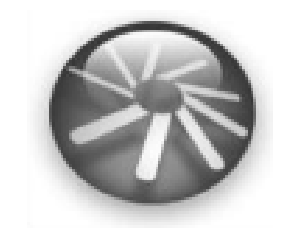

In [19]:
img =  cv2.imread('pic.png', cv2.COLOR_BAYER_RG2GRAY)
imshow(img)

### 高斯滤波

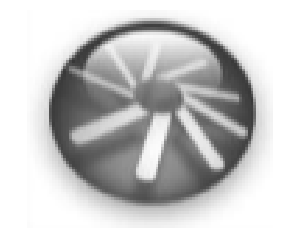

In [4]:
kernel = cv2.getGaussianKernel(3, -1)
img_gauss = cv2.filter2D(img, -1, kernel)
imshow(img_gauss)

### 均值滤波

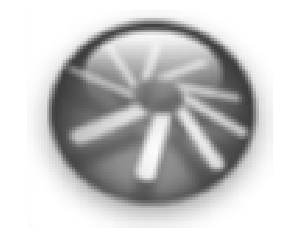

In [5]:
img_blur = cv2.blur(img, (3,3))
imshow(img_blur)

### 中值滤波

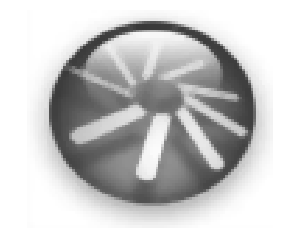

In [6]:
img_medianblur = cv2.medianBlur(img,3)
imshow(img_medianblur)

## 空域锐化

### lapaian算子

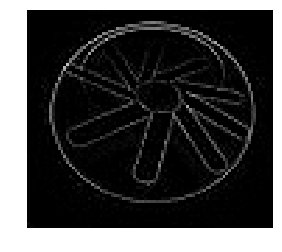

In [7]:
img_lap = cv2.Laplacian(img, -1, 2)
img_lap_dst = cv2.convertScaleAbs(img_lap)
imshow(img_lap_dst)

### sobel算子

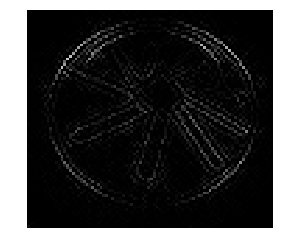

In [8]:
# 2阶
img_sobel = cv2.Sobel(img, -1,2,2)
imshow(img_sobel)

### prewitt算子
两个方向的kernel是
$$
 \left[
 \begin{matrix}
   1 & 1 & 1 \\
   0 & 0 & 0 \\
   -1 & -1 & -1
  \end{matrix}
  \right] 
$$

$$
 \left[
 \begin{matrix}
   -1 & 0 & 1 \\
   -1 & 0 & 1 \\
   -1 & 0 & 1
  \end{matrix}
  \right] 
$$

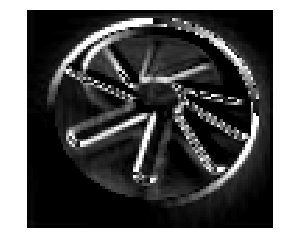

In [9]:
import numpy as np
kx = np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]).reshape(3,3)
ky = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1]).reshape(3,3)
img_x = cv2.filter2D(img, -1, kx)
img_y = cv2.filter2D(img, -1, ky)
img_prewitt = img_x + img_y
imshow(img_prewitt)

## 频域滤波
### 低通滤波
傅里叶变换

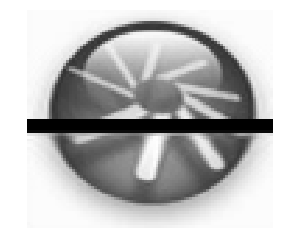

In [10]:
mask = np.zeros(img.shape, np.uint8)
r = int(mask.shape[0]/2)
c = int(mask.shape[1]/2)
rad = 40
cv2.circle(mask, (r,c), rad , (1,1,1), thickness=-1)  
f1 = np.fft.fft2(img)
f1shift = np.fft.fftshift(f1)
f1shift *= mask
f2shift = np.fft.ifftshift(f1shift)
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new =  (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))

imshow(img_new)

### 高通滤波

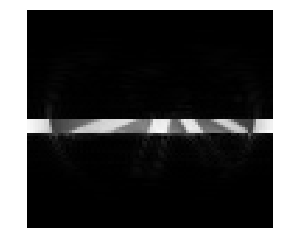

In [11]:
mask = np.ones(img.shape, np.uint8)
r = int(mask.shape[0]/2)
c = int(mask.shape[1]/2)
rad = 40
cv2.circle(mask, (r,c), rad , (0, 0, 0), thickness=-1)  
f1 = np.fft.fft2(img)
f1shift = np.fft.fftshift(f1)
f1shift *= mask
f2shift = np.fft.ifftshift(f1shift)
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new =  (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))

imshow(img_new)

## 图像清晰与二值化

Robert算子

交叉梯度
$$
 \left[
 \begin{matrix}
   -1 & 0 \\
   0 & 1
  \end{matrix}
  \right] 
$$

$$
 \left[
 \begin{matrix}
   0 & -1 \\
   1 & 0
  \end{matrix}
  \right] 
$$

算出两个方向梯度并求值,可以近似使用绝对值
$$
M(x, y) = |g_{x}|+|g_{y}|
$$

对两个kernel使用filter2D进行滤波然后计算值即可

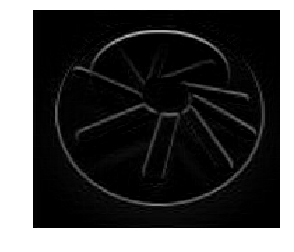

In [54]:
# Robert算子
img_f = cv2.imread('pic.png')
img_x = cv2.filter2D(img_f, -1, np.array([-1, 0, 0, 1]).reshape(2,2))
img_y =cv2.filter2D(img_f, -1, np.array([0, -1, 1, 0]).reshape(2,2))
img_g = np.abs(img_x)+np.abs(img_y)

imshow(img_g)

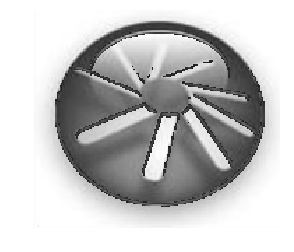

In [55]:
t = 30
mask = img_g < t
img_f_t = img_f * mask
img_g_t = img_g * ~mask
img1 = img_f_t + img_g_t
imshow(img1)

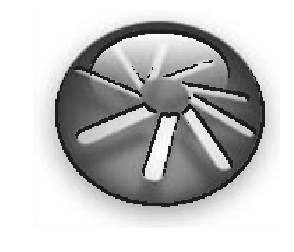

In [56]:
img_t = t * ~mask
img2 = img_f_t + img_t
imshow(img2)

In [57]:
(img1 == img2).sum()

76629

### 二值化
使用 thershold 就行了

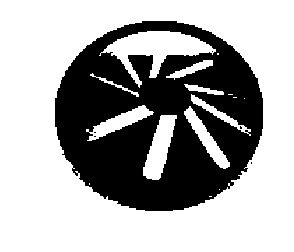

In [13]:
img = cv2.imread('pic.png', 0)
binary_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
imshow(binary_img[1])